In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')


In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df['revenue'] = df['Quantity'] * df['UnitPrice']

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [12]:
## contry with revenue
country_revenue = df.groupby('Country')['revenue'].sum().sort_values(ascending=False)

print(country_revenue)

Objective: Segment customers based on Recency, Frequency, and Monetary metrics to identify distinct customer groups.


Approach:

Recency: Days since the customer's last purchase.

Frequency: Total number of purchases.

Monetary: Total amount spent

In [15]:
import datetime as dt

In [18]:
#data preprocessing
df.dropna(subset=['CustomerID'], inplace = True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [20]:
# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [23]:
# set snapshot date

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

In [24]:
#compute RFM metrics

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo': 'nunique', 'TotalPrice': 'sum'}).reset_index()

In [25]:
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

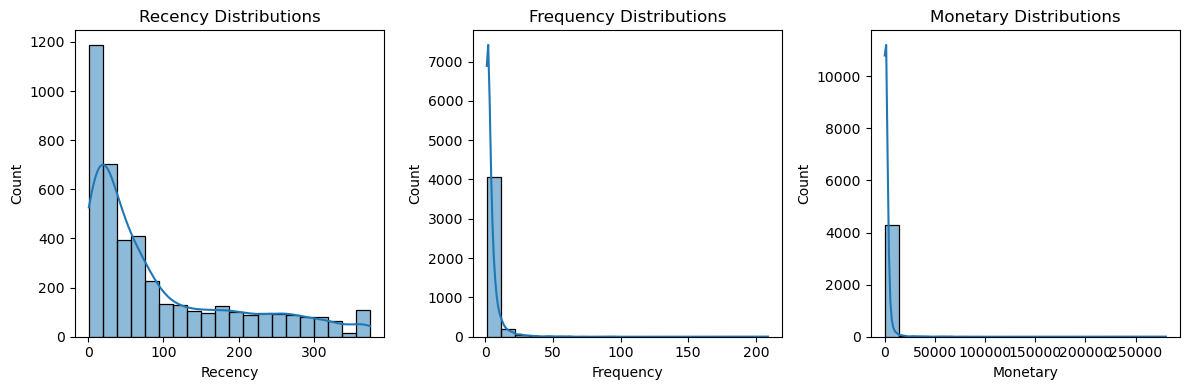

In [27]:
# RFM distributions
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins = 20 ,kde = True)
plt.title('Recency Distributions')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins = 20 ,kde = True)
plt.title('Frequency Distributions')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins = 20, kde = True)
plt.title('Monetary Distributions')

plt.tight_layout()
plt.show()

In [28]:
#Segmentation:

# RFM segmentation
rfm['R_Score'] = pd.qcut(rfm['Recency'],4, labels = [4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

Customer Segmentation Using K-Means Clustering
Objective: Cluster customers into distinct groups based on RFM metrics.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_


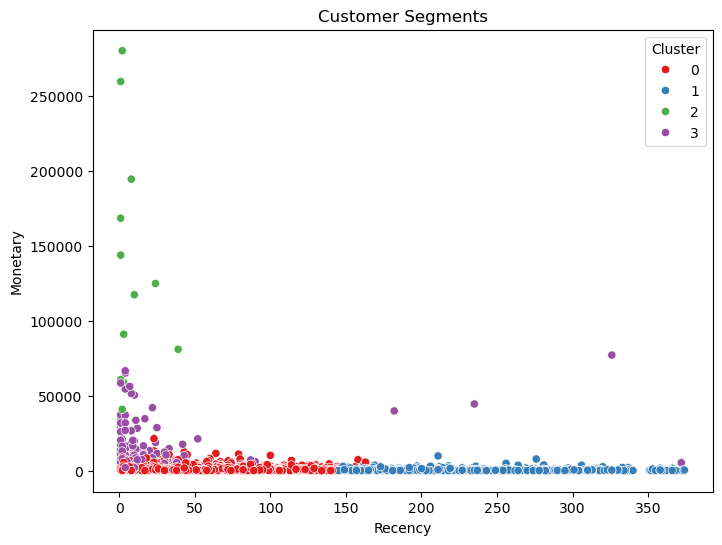

In [30]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()


Sales Trend Analysis Over Time
Objective: Analyze monthly sales trends to identify seasonal patterns.

In [31]:
# Monthly sales
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Convert to datetime for plotting
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].dt.to_timestamp()


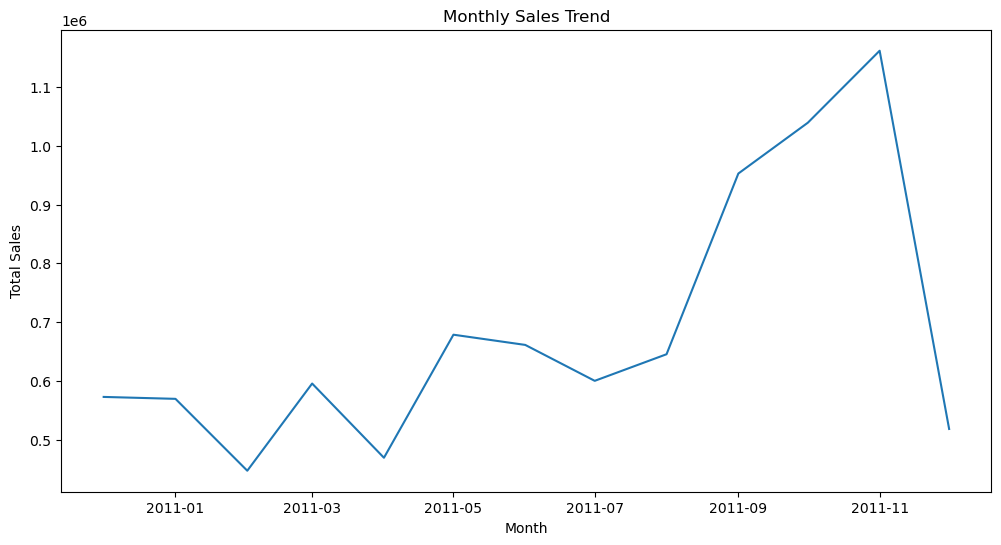

In [32]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='InvoiceMonth', y='TotalPrice')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


Top 10 Products by Sales
Objective: Identify the top-selling products based on total revenue.

In [33]:
# Top products
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()


In [34]:
print(top_products)

                          Description  TotalPrice
0         PAPER CRAFT , LITTLE BIRDIE   168469.60
1            REGENCY CAKESTAND 3 TIER   142592.95
2  WHITE HANGING HEART T-LIGHT HOLDER   100448.15
3             JUMBO BAG RED RETROSPOT    85220.78
4      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
5                             POSTAGE    77803.96
6                       PARTY BUNTING    68844.33
7       ASSORTED COLOUR BIRD ORNAMENT    56580.34
8                              Manual    53779.93
9                  RABBIT NIGHT LIGHT    51346.20


C:\Users\abhijeetk\AppData\Local\Temp\ipykernel_8900\162916533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalPrice', y='Description', palette='viridis')


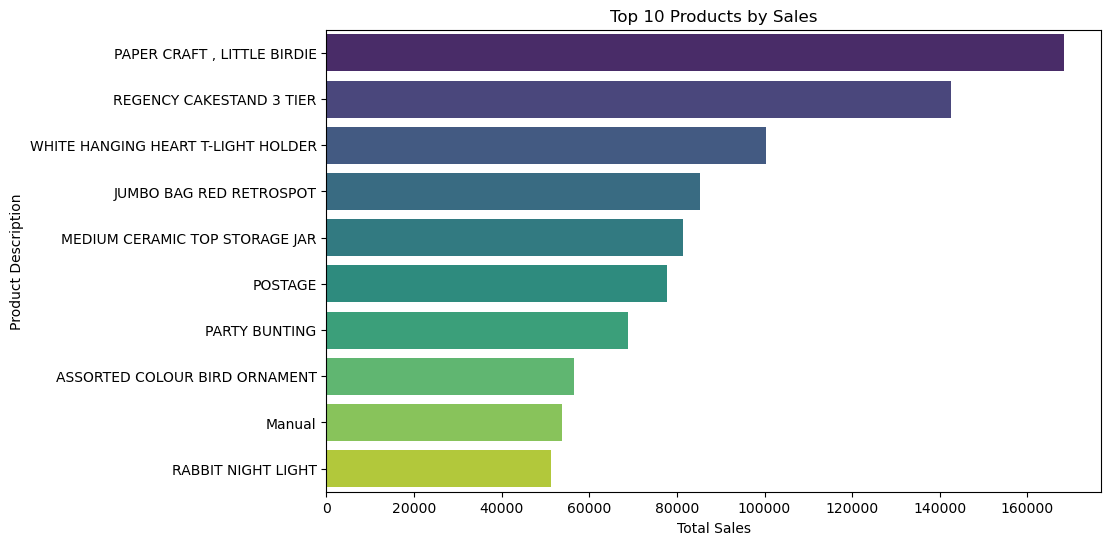

In [36]:
# Plot top products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalPrice', y='Description', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()


Country-wise Sales Distribution
Objective: Analyze sales distribution across different countries.

In [37]:
# Sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()


C:\Users\abhijeetk\AppData\Local\Temp\ipykernel_8900\3948762868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='TotalPrice', y='Country', palette='coolwarm')


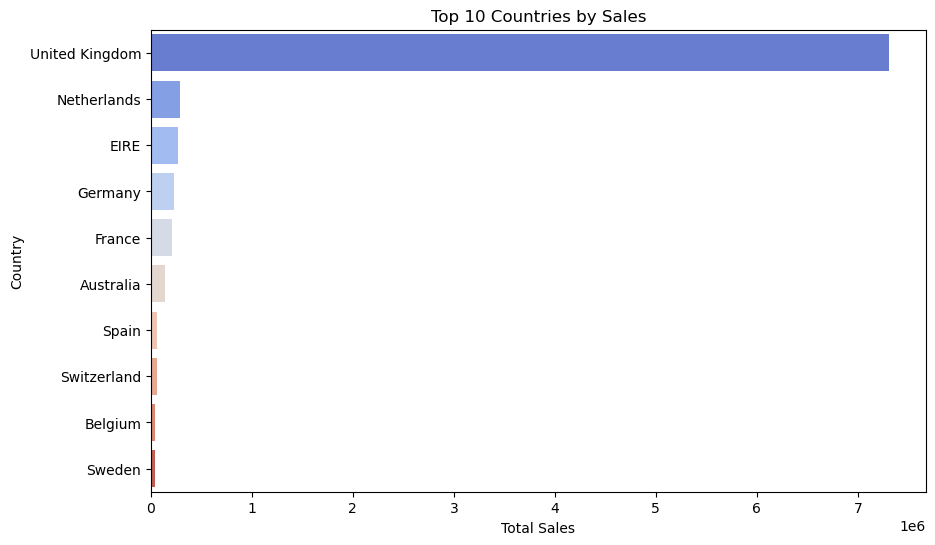

In [38]:
# Plot country sales
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='TotalPrice', y='Country', palette='coolwarm')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()
